In [1]:
import pandas as pd
import json
import requests
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import time
from generate_and_plot_baseline_metrics import *

In [2]:
# Get all the datasets from API except the ones from PLAZI, GEO-TAG and PANGEA
summary_metadata = get_metadata_from_API(None, ['7ce8aef0-9e92-11dc-8738-b8a03c50a862',
                                                'd5778510-eb28-11da-8629-b8a03c50a862',
                                                'ef69a030-3940-11dd-b168-b8a03c50a862'], 900)

In [3]:
################ Split dataset per type ################
checklist_summary_metadata = summary_metadata[summary_metadata.type == "CHECKLIST"]
other_summary_metadata = summary_metadata[summary_metadata.type != "CHECKLIST"]

In [4]:
################ Get metadata for example dataset ################
example_datasets = example_datasets = pd.read_table("../potentially_exemplary_datasets.txt", names=["uuid"])["uuid"].tolist()
summary_example_datasets = get_metadata_from_API(example_datasets)

In [5]:
################ Esthetic ################

scores_2 = {0: '#dddad9', 1: '#8add7c'}
scores_3 = {0: '#dddad9', 1: '#f7e865', 2: '#8add7c'}
scores_4 = {0: '#dddad9', 1: '#f7e865', 2: '#cef442', 3: '#8add7c'}

score_names = {"score_what" : {
                    "label": "what",
                    "score": scores_4,
                    "length": 30
                },
               "score_who" : {
                    "label": "who",
                    "score": scores_3,
                    "length": 20
               },
               "score_why" : {
                    "label": "why",
                    "score": scores_2,
                    "length": 10
               },
               "score_where" : {
                    "label": "where",
                    "score": scores_3,
                    "length": 20
               }, 
               "score_when" : {
                    "label": "when",
                    "score": scores_2,
                    "length": 20
               }, 
               "score_how" : {
                    "label": "how",
                    "score": scores_3,
                    "length": 20
               }}

# Quality statistics


## Examplary datasets
* [Asteroids, ophiuroids and holothurians from the South-Eastern Weddell Sea (Southern Ocean)](https://www.gbif.org/dataset/a6058a01-5880-41f5-9dbf-3eef8591f714)
* [Circumpolar dataset of sequenced specimens of Promachocrinus kerguelensis (Echinodermata, Crinoidea)](https://www.gbif.org/dataset/9dae1fa0-5800-4f18-8f4e-a87f05c73eb1)
* [Sightings of marine mammals carried out during oceanographic surveys in the Argentine continental shelf](https://www.gbif.org/dataset/79e731ed-fe9b-4d50-93f7-ab1f01636385)
* [Data from ILAM surveys conducted by ARCOS in Rusumo landscape for year 2016](https://www.gbif.org/dataset/5d17a4fd-7249-46c0-a56b-1924d477b29e)
* [Djamde Wildlife Reserve in Togo: diversity of woody species](https://www.gbif.org/dataset/966b3e29-f1e4-4190-badd-100bc989788f)
* [Monitoring data of marine turtles on the Togolese coast over 2012-2013 years](https://www.gbif.org/dataset/11c00ed9-1c1b-47d1-9eb4-66a491c7d7b3)
* [Bird tracking - GPS tracking of Lesser Black-backed Gulls and Herring Gulls breeding at the southern North Sea coast](https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e)
* [Alien plant presence dataset from the point-radius plot surveys in 2010-2015 in Taiwan](https://www.gbif.org/dataset/e1f3be55-9f45-474c-8374-502b236e0ad0)


## Quality scoring for one dataset: examples

### One examplary dataset

[Asteroids, ophiuroids and holothurians from the South-Eastern Weddell Sea (Southern Ocean)](https://www.gbif.org/dataset/a6058a01-5880-41f5-9dbf-3eef8591f714)

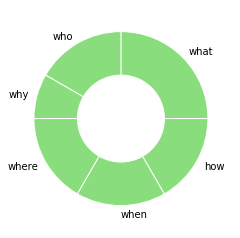

In [6]:
uuid = "a6058a01-5880-41f5-9dbf-3eef8591f714"
size = 0.5
base_radius = 1
fig, ax = plt.subplots()
ax = make_individual_plot(ax, uuid, summary_example_datasets, score_names, base_radius, size, True)
plt.show()

### One dataset to be improved

[Census of medicinal plants of Benin.](https://www.gbif.org/dataset/acca8633-d38a-4cd7-a6f8-5a2d4e29832a)

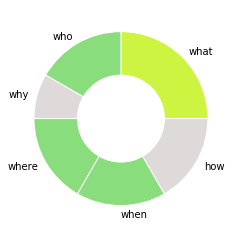

In [7]:
uuid = "acca8633-d38a-4cd7-a6f8-5a2d4e29832a"
size = 0.5
base_radius = 1
fig, ax = plt.subplots()
ax = make_individual_plot(ax, uuid, summary_metadata, score_names, base_radius, size, True)
plt.show()

## Quality scoring for multiple datasets

### Examplary datasets

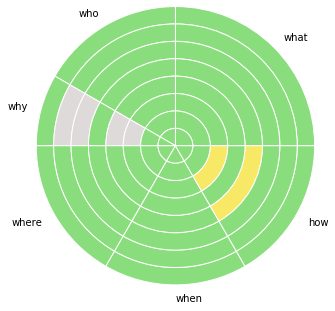

In [8]:
plot_entire_dataset(ax, summary_example_datasets, score_names, 0.2)

### 50 non-checklists

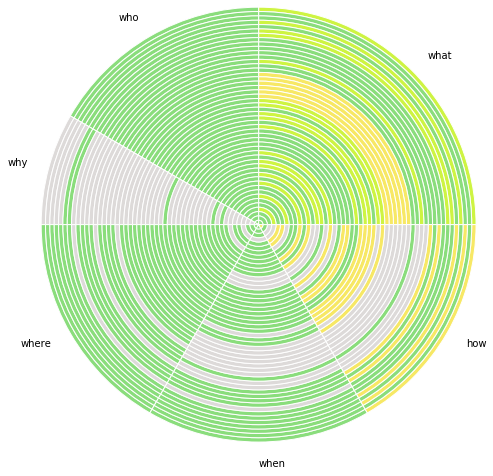

In [9]:
plot_entire_dataset(ax, other_summary_metadata[0:50], score_names)

### 50 checklists

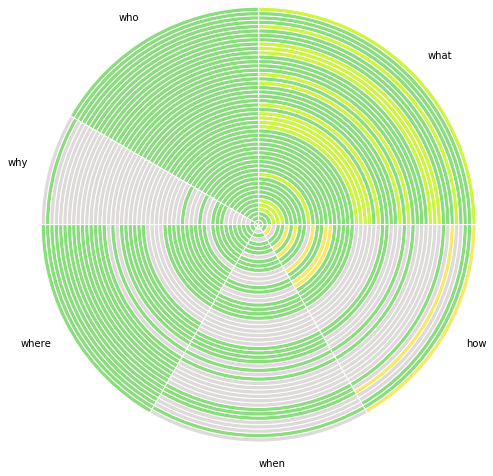

In [10]:
plot_entire_dataset(ax, checklist_summary_metadata[0:50], score_names)

In [11]:
summary_metadata.to_csv("summary_baseline_metrics_metadata_PLAZI_GEOTAG_PANGEA_excluded.txt", sep = "\t")